In [1]:
import os
path = os.getcwd()
print(path)
dlpy_path = path[0:path.rfind('/')]+'/python-dlpy/'
print(dlpy_path)

/home/sasdemo/Python
/home/sasdemo/python-dlpy/


In [2]:
from swat import *
import swat as sw
from pprint import pprint
%matplotlib inline
import matplotlib
import sys
import dlpy
from dlpy.utils import *
from swat import *
import swat as sw
from pprint import pprint
%matplotlib inline
import matplotlib
import sys
import dlpy
from dlpy.utils import *
from dlpy.images import ImageTable
from dlpy.splitting import two_way_split
from dlpy.blocks import *
from dlpy.applications import Yolov2 

In [3]:
# Connect to a CAS sever
s = CAS('sasserver.demo.sas.com', 5570, 'xxx', 'xxx')
s.loadactionset('image')
s.loadactionset('deepLearn')

NOTE: Added action set 'image'.
NOTE: Added action set 'deepLearn'.


[actionset]

 'deepLearn'

+ Elapsed: 0.0255s, user: 0.001s, sys: 0.008s, mem: 0.212mb

In [5]:
from utils2 import *
object_detection_targets = create_object_detection_table(s, 
                                                         data_path = '/opt/sasinside/DemoData/data', 
                                                         local_path = '/opt/sasinside/DemoData/data',
                                                         coord_type = 'yolo', 
                                                         output = 'detTbl')


NOTE: Images are processed.
NOTE: Object detection table is successfully created.


In [4]:
s.sessionprop.setsessopt(timeout=31536000)
s.table.addcaslib(activeonadd=False,datasource={'srctype':'path'},
                  name='dnfs',path=path,subdirectories=True)
print(path)
#s.save('detTbl',name='images',caslib='dnfs',replace=True)
s.table.loadtable(casout={'name':'detTbl','replace':True}, 
                  caslib='dnfs',
                 path="images.sashdat");

NOTE: Cloud Analytic Services added the caslib 'dnfs'.
/home/sasdemo/Python
NOTE: Cloud Analytic Services made the file images.sashdat available as table DETTBL in caslib CASUSER(sasdemo).


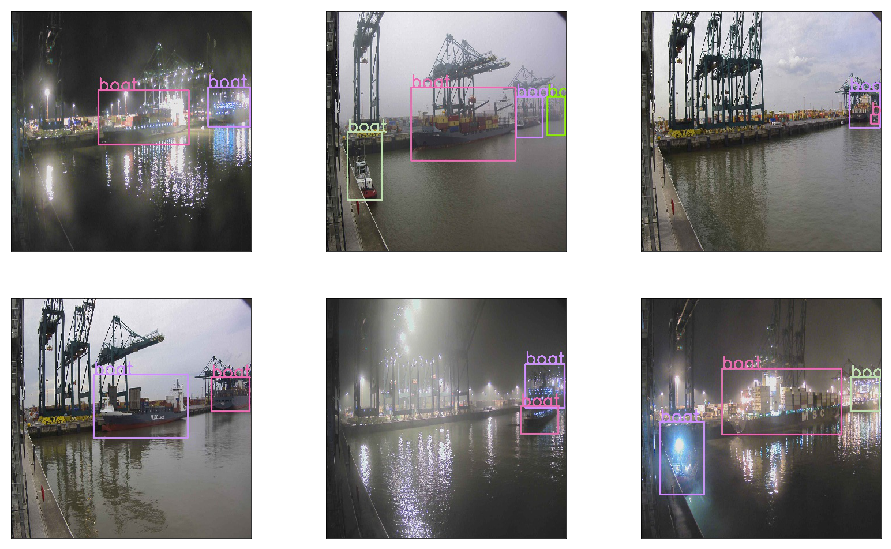

In [8]:
display_object_detections(s, 'detTbl', 'yolo', max_objects=11, num_plot=6, n_col=3)

In [5]:
from utils2 import *
anchors=get_anchors(s,data='detTbl',n_anchors=5, coord_type='yolo')
print(anchors)
#anchors=(5.420401088121431, 4.053397942642906, 4.207006538929443, 1.8237293863206265, 1.7389810938330639, 1.5268184771693472, 2.142821450335162, 2.928305233935949, 0.7666249533929913, 0.9248726075068338)

(1.6919248436278336, 1.4846889931369986, 0.7500721935221712, 0.9114219745633735, 5.535661361757955, 4.1615758708255495, 4.24207850772097, 1.8671380112807199, 2.138000290023198, 2.905757497636852)


In [6]:
targets = ['_nObjects_'];
for i in range(0,12):
    targets.append('_Object%d_'%i)
    for sp in ["x", "y", "width", "height"]:
        targets.append ('_Object%d_%s'%(i, sp))
                  
inputVars = []
inputVars.insert(0, '_image_')
print ("targets")
print (targets)
print ("inputVars")
print (inputVars)

targets
['_nObjects_', '_Object0_', '_Object0_x', '_Object0_y', '_Object0_width', '_Object0_height', '_Object1_', '_Object1_x', '_Object1_y', '_Object1_width', '_Object1_height', '_Object2_', '_Object2_x', '_Object2_y', '_Object2_width', '_Object2_height', '_Object3_', '_Object3_x', '_Object3_y', '_Object3_width', '_Object3_height', '_Object4_', '_Object4_x', '_Object4_y', '_Object4_width', '_Object4_height', '_Object5_', '_Object5_x', '_Object5_y', '_Object5_width', '_Object5_height', '_Object6_', '_Object6_x', '_Object6_y', '_Object6_width', '_Object6_height', '_Object7_', '_Object7_x', '_Object7_y', '_Object7_width', '_Object7_height', '_Object8_', '_Object8_x', '_Object8_y', '_Object8_width', '_Object8_height', '_Object9_', '_Object9_x', '_Object9_y', '_Object9_width', '_Object9_height', '_Object10_', '_Object10_x', '_Object10_y', '_Object10_width', '_Object10_height', '_Object11_', '_Object11_x', '_Object11_y', '_Object11_width', '_Object11_height']
inputVars
['_image_']


In [7]:
model = Yolov2(conn=s, randomMutation = 'none', actx = 'leaky', coordType='yolo',
            n_classes=11, predictionsPerGrid=5, width=416, height=416, 
            randomBoxes = False, softMaxForClassProb=True, matchAnchorSize=False, numToForceCoord=-1,
            rescore=True,
            classScale = 1.0, coordScale=1.0, predictionNotAObjectScale = 1, objectScale=5,
            detectionThreshold=0.2, iouThreshold = 0.1, act = 'LOGISTIC',
            anchors = anchors
            )

NOTE: Input layer added.
NOTE: Convolutional layer added.
NOTE: Batch Normalization layer added.
NOTE: Pooling layer added.
NOTE: Convolutional layer added.
NOTE: Batch Normalization layer added.
NOTE: Pooling layer added.
NOTE: Convolutional layer added.
NOTE: Batch Normalization layer added.
NOTE: Convolutional layer added.
NOTE: Batch Normalization layer added.
NOTE: Convolutional layer added.
NOTE: Batch Normalization layer added.
NOTE: Pooling layer added.
NOTE: Convolutional layer added.
NOTE: Batch Normalization layer added.
NOTE: Convolutional layer added.
NOTE: Batch Normalization layer added.
NOTE: Convolutional layer added.
NOTE: Batch Normalization layer added.
NOTE: Pooling layer added.
NOTE: Convolutional layer added.
NOTE: Batch Normalization layer added.
NOTE: Convolutional layer added.
NOTE: Batch Normalization layer added.
NOTE: Convolutional layer added.
NOTE: Batch Normalization layer added.
NOTE: Convolutional layer added.
NOTE: Batch Normalization layer added.
NOT

In [10]:
optimizer=dict(miniBatchSize=1,logLevel=3, 
               maxEpochs=10, regL2=0.0005, 
               algorithm=dict(method='momentum', momentum=0.9,
                              clipGradMax=100, clipGradMin=-100,
                              learningRate=0.0001
                             )
              )
r=model.fit(data='detTbl', optimizer=optimizer, forceEqualPadding = True,
            # specify data type of input and output layers
            dataspecs=[
                   dict(type='IMAGE', layer='Data', data=inputVars),
                   dict(type='OBJECTDETECTION', layer='Detect1', data=targets)
                   ],
            nthreads=8)

NOTE : Training from scratch.
NOTE:  The Synchronous mode is enabled.
NOTE:  The total number of parameters is 19899296.
NOTE:  The approximate memory cost is 3740.00 MB.
NOTE:  Loading weights cost       0.00 (s).
NOTE:  Initializing each layer cost       2.49 (s).
NOTE:  The total number of threads on each worker is 8.
NOTE:  The total mini-batch size per thread on each worker is 1.
NOTE:  The maximum mini-batch size across all workers for the synchronous mode is 8.
NOTE:  Batch              nUsed   Learning Rate     Loss    Fit Error      Time (s) (Training)
NOTE:        0                8  0.0001          111.37      0.6031         7.59
NOTE:        1                8  0.0001           97.39      0.5421         6.94
NOTE:        2                8  0.0001          67.755      0.6175         6.55
NOTE:        3                8  0.0001          28.706      0.5298         7.19
NOTE:        4                8  0.0001          12.841      0.5811         7.09
NOTE:        5             

In [11]:
model.deploy(output_format='table', path='/home/sasdemo/Yolo_Model_boats')

NOTE: Model table saved successfully.


In [12]:
#maken test tabel
from dlpy.images import *
testSetTbl = ImageTable.load_files(conn=s, caslib='dnfs', path='/opt/sasinside/DemoData/testdata')
#scoring_tbl = ImageTable.load_files(conn=s, path='/opt/sasinside/DemoData/testdata', casout={'name':'test'})

testSetTbl.resize(height=416, width=416, inplace=True)

In [13]:
model_load = Model(s)
model_file = '/home/sasdemo/Yolo_Model_boats/Yolov2.sashdat'
model_load.load(path=model_file)

NameError: name 'Model' is not defined

In [ ]:
model_load.predict(data=testSetTbl)

In [ ]:
plot_obj_det_image(conn=s, table=model_load.predict_res_tbl, coord_type='yolo', 
                   max_objects=11, num_plot=20, random_plot=False)